In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('titanictrain.csv')
df.shape

(891, 12)

In [3]:
df.head() # prints top 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    object  
 1   Pclass          891 non-null    object  
 2   Sex             891 non-null    object  
 3   Age             714 non-null    float64 
 4   Fare            891 non-null    float64 
 5   Cabin           891 non-null    object  
 6   Embarked        891 non-null    object  
 7   Age_categories  714 non-null    category
dtypes: category(1), float64(2), object(5)
memory usage: 49.9+ KB


In [5]:
df.drop(['Parch', 'Name', 'Ticket', 'PassengerId', 'SibSp'], axis=1, inplace=True, errors='raise')
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,22.0,7.2500,NaN,NaN
1,1,1,female,38.0,71.2833,C85,C
2,1,3,female,26.0,7.9250,NaN,NaN
3,1,1,female,35.0,53.1000,C123,NaN
4,0,3,male,35.0,8.0500,NaN,S


In [6]:
df['Survived'] = df['Survived'].map({0: 'Died', 1: 'Survived'})
df['Pclass'] = df['Pclass'].map({1: 'Luxury class', 2: 'Economy class', 3: 'Lower Class'})
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'C': 'Chennai', 'S': 'Srinagar', 'Q': 'QueensTown'})

In [7]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,Died,Lower Class,male,22.0,7.2500,NaN,Srinagar
1,Survived,Luxury class,female,38.0,71.2833,C85,Chennai
2,Survived,Lower Class,female,26.0,7.9250,NaN,Srinagar
3,Survived,Luxury class,female,35.0,53.1000,C123,Srinagar
4,Died,Lower Class,male,35.0,8.0500,NaN,Srinagar


In [9]:
df['Cabin'] = df['Cabin'].fillna('C85')
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,Died,Lower Class,male,22.0,7.2500,C85,Srinagar
1,Survived,Luxury class,female,38.0,71.2833,C85,Chennai
2,Survived,Lower Class,female,26.0,7.9250,C85,Srinagar
3,Survived,Luxury class,female,35.0,53.1000,C123,Srinagar
4,Died,Lower Class,male,35.0,8.0500,C85,Srinagar
5,Died,Lower Class,male,NaN,8.4583,C85,QueensTown
6,Died,Luxury class,male,54.0,51.8625,E46,Srinagar
7,Died,Lower Class,male,2.0,21.0750,C85,Srinagar
8,Survived,Lower Class,female,27.0,11.1333,C85,Srinagar
9,Survived,Economy class,female,14.0,30.0708,C85,Chennai


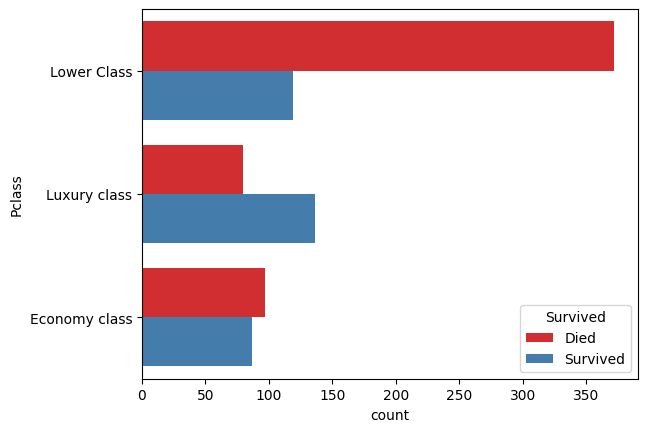

In [37]:
sns.countplot(data=df, y='Pclass', hue='Survived', palette='Set1', saturation=0.8)
plt.show()

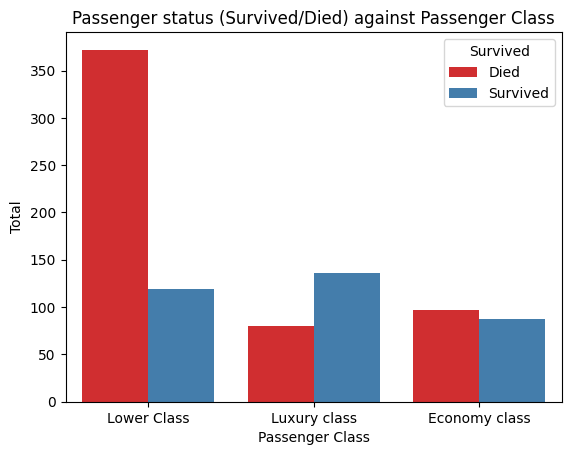

In [34]:
ax = sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1', saturation=0.8)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class', xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

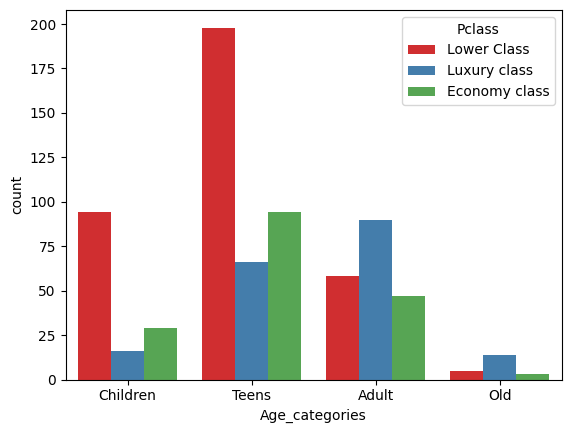

In [49]:
interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
df['Age_categories'] = pd.cut(df.Age, interval, labels=categories)
sns.countplot(data=df, x='Age_categories', hue='Pclass', palette="Set1", saturation=0.8)
plt.show()

In [50]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Age_categories
0,Died,Lower Class,male,22.0,7.2500,C85,Srinagar,Teens
1,Survived,Luxury class,female,38.0,71.2833,C85,Chennai,Adult
2,Survived,Lower Class,female,26.0,7.9250,C85,Srinagar,Teens
3,Survived,Luxury class,female,35.0,53.1000,C123,Srinagar,Teens
4,Died,Lower Class,male,35.0,8.0500,C85,Srinagar,Teens


In [51]:
pd.crosstab(df.Sex, df.Survived)

Survived,Died,Survived
Sex,,
female,81,233
male,468,109


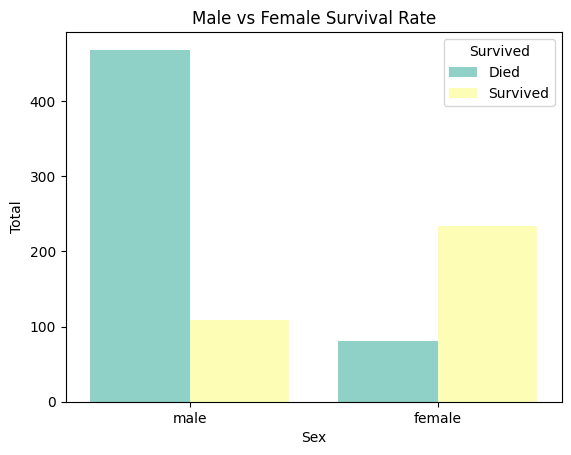

In [61]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set3', saturation=0.95).set(title='Male vs Female Survival Rate', xlabel='Sex', ylabel='Total')
plt.show()